# Google play store dataset analyzing ⚙️

### ✨ Task0: import necessary libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

### ✨ Task1: loading and initial exploration 

In [61]:
# step1: load the dataset

google_play_store_df = pd.read_csv("GooglePlayStoreData.csv")
print("Load dataset done")

Load dataset done


In [ ]:
# step2: display the first 6 rows and the last 6 rows

print("The first 6 rows:")
display(google_play_store_df.head(6))

print("\nThe last 6 rows:")
display(google_play_store_df.tail(6))

The first 6 rows:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000.0,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up



The last 6 rows:


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10.0,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307.0,19M,10000000.0,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# step3: show the shape of the dataset

print("The shape of dataset:", google_play_store_df.shape)

The shape of dataset: (10841, 13)


#### 📋 Explain the output:
- The dataset contains 10841 rows and 13 columns so the dataset contains 10841 records each with 13 features

In [ ]:
# step4: generate descriptive statistics for numerical columns

# convert Rating column and Reviews column to numeric and handle non numeric entries
google_play_store_df["Rating"] = pd.to_numeric(google_play_store_df["Rating"], errors="coerce")
google_play_store_df["Reviews"] = pd.to_numeric(google_play_store_df["Reviews"], errors="coerce")

# ensure Installs column is string then remove +, from Installs column then convert it to numeric
google_play_store_df["Installs"] = google_play_store_df["Installs"].astype(str)
google_play_store_df["Installs"] = google_play_store_df["Installs"].str.replace("[+,]", "", regex=True)
google_play_store_df["Installs"] = pd.to_numeric(google_play_store_df["Installs"], errors="coerce")

# descriptive statistics
print("The descriptive statistics for numerical columns:")
display(google_play_store_df[["Rating", "Reviews", "Installs"]].describe())

The descriptive statistics for numerical columns:


,Rating,Reviews,Installs
count,9367.000000,1.084000e+04,1.084000e+04
mean,4.193338,4.441529e+05,1.546434e+07
std,0.537431,2.927761e+06,8.502936e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,3.800000e+01,1.000000e+03
50%,4.300000,2.094000e+03,1.000000e+05
75%,4.500000,5.477550e+04,5.000000e+06
max,19.000000,7.815831e+07,1.000000e+09


#### 📋 Explain the output:
- Rating: most apps have ratings around 4.2 and one app has a ratings of 19 which is outlier so the ratings should be between 1 and 5
- Rating: the std 0.5 small so this means that most ratings are close to the average 4.2
- Reviews: half of the apps have fewer than 2094 reviews but some very popular apps have millions
- Reviews: the std 2927761 large so there is a large variation in the number of reviews
- Installs: most apps have less than 100000 installs but a few reach up to 1 billion installs
- Installs: the std 85029360 large so this means there is big difference in number of reviews between apps

### ✨ Task2: data cleaning

In [ ]:
# step1: print the data types and check for null values

print("The data types of all columns:")
print(google_play_store_df.dtypes)

print("\nThe null values in each column:")
print(google_play_store_df.isnull().sum())

The data types of all columns:
App                object
Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

The null values in each column:
App                  0
Category             0
Rating            1474
Reviews              1
Size                 0
Installs             1
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


#### 📋 Explain the output:
- The output for null values shows how many missing values are in each column of dataset
- Most columns have no missing values
- Rating column has the most missing values 1474 which means many apps did not get rated

In [ ]:
# step2: drop rows where Type column is missing

google_play_store_df_cleaned = google_play_store_df.dropna(subset=["Type"])
print(f"The new shape is: {google_play_store_df_cleaned.shape}")

The new shape is: (10840, 13)


#### 📋 Explain the output:
- The dataset has 10840 rows and 13 columns so only rows with valid Type are kept

In [ ]:
# step3: fill missing values in Rating column by median of same app category

# check the number of missing values in Rating column
print("The missing values in Rating column:", google_play_store_df_cleaned["Rating"].isnull().sum())

# fill missing Rating values with median
google_play_store_df_cleaned["Rating"] = google_play_store_df_cleaned.groupby("Category")["Rating"].transform(lambda x: x.fillna(x.median()))

# verify that there no missing Rating values
print("The missing values in Rating column after filling:", google_play_store_df_cleaned["Rating"].isnull().sum())

The missing values in Rating column: 1473
The missing values in Rating column after filling: 0


#### 📋 Explain the output:
- Rating column have 1473 missing ratings so after replacing them with the median rating for each app there are no missing ratings left
- Using the median to fill missing ratings because it is not affected by very high or very low ratings so we get a more typical rating for each app in dataset

In [ ]:
# step4: clean and convert the Installs column

# ensure Installs column is string then remove +, from Installs column then convert it to numeric
google_play_store_df_cleaned["Installs"] = google_play_store_df_cleaned["Installs"].astype(str)
google_play_store_df_cleaned["Installs"] = google_play_store_df_cleaned["Installs"].str.replace("[+,]", "", regex=True)
google_play_store_df_cleaned["Installs"] = pd.to_numeric(google_play_store_df_cleaned["Installs"], errors="coerce")

# verify
print(f"The data type of Installs column after conversion: {google_play_store_df_cleaned['Installs'].dtype}")

The data type of Installs column after conversion: float64


In [ ]:
# step5: clean and convert the Price column

# remove $ from Price column then convert it to numeric
google_play_store_df_cleaned["Price"] = google_play_store_df_cleaned["Price"].str.replace("$", "", regex=False)
google_play_store_df_cleaned["Price"] = pd.to_numeric(google_play_store_df_cleaned["Price"], errors="coerce")

# verify
print(f"The data type of Price column after conversion: {google_play_store_df_cleaned['Price'].dtype}")

The data type of Price column after conversion: float64


### ✨ Task3: data filtering

In [ ]:
# step1: create a DataFrame containing only free apps

# filter for free apps from Type column 
free_apps = google_play_store_df_cleaned[google_play_store_df_cleaned["Type"] == "Free"]

print(f"The first 5 rows of free apps:")
print(free_apps.head())

The first 5 rows of free apps:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0   19M     10000.0  Free    0.0       Everyone   
1     967.0   14M    500000.0  Free    0.0       Everyone   
2   87510.0  8.7M   5000000.0  Free    0.0       Everyone   
3  215644.0   25M  50000000.0  Free    0.0           Teen   
4     967.0  2.8M    100000.0  Free    0.0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018     

In [ ]:
# step2: filter apps

# filter with Rating greater than 4.5 and more than 1000000 Installs for apps 
high_rating_high_installs = google_play_store_df_cleaned[(google_play_store_df_cleaned["Rating"] > 4.5) & (google_play_store_df_cleaned["Installs"] > 1000000)]

print(f"The filtered apps so Rating > 4.5 and Installs > 1000000:")
print(high_rating_high_installs.head())

The filtered apps so Rating > 4.5 and Installs > 1000000:
                                                   App             Category  \
2    U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
19                                        ibis Paint X       ART_AND_DESIGN   
45   Canva: Poster, banner, card maker & graphic de...       ART_AND_DESIGN   
70   Fines of the State Traffic Safety Inspectorate...    AUTO_AND_VEHICLES   
139                               Wattpad 📖 Free Books  BOOKS_AND_REFERENCE   

     Rating    Reviews                Size     Installs  Type  Price  \
2       4.7    87510.0                8.7M    5000000.0  Free    0.0   
19      4.6   224399.0                 31M   10000000.0  Free    0.0   
45      4.7   174531.0                 24M   10000000.0  Free    0.0   
70      4.8   116986.0                 35M    5000000.0  Free    0.0   
139     4.6  2914724.0  Varies with device  100000000.0  Free    0.0   

    Content Rating             Gen

In [ ]:
# step3: list top 3 most installed App in Category column is Education value 

# filter for apps
education_apps = google_play_store_df_cleaned[google_play_store_df_cleaned["Category"] == "Education"]

# check if there are any records for the Education apps
if not education_apps.empty:
    # sort by Installs column in descending order and get the top 3
    top_three_education_apps = education_apps.sort_values(by="Installs", ascending=False).head(3)

    print(f"The top 3 App with Category is Education its installed:")
    print(top_three_education_apps[["App", "Installs"]])
else:
    print("No apps found in the Education apps")

No apps found in the Education apps


#### 📋 Explain the output:
- This means that no App in dataset matched Category is Education so note the case sensitive

### ✨ Task4: grouping and aggregation 

In [67]:
# step1: group by Category and calculate average Rating from dataset

# group and calculate the mean
average_rating_by_category = google_play_store_df_cleaned.groupby('Category')['Rating'].mean().sort_values(ascending=True)

print("The average Rating by Category is:")
print(average_rating_by_category)

The average Rating by Category is:
Category
DATING                  3.992308
MAPS_AND_NAVIGATION     4.065693
TOOLS                   4.067141
VIDEO_PLAYERS           4.075429
LIFESTYLE               4.113613
ENTERTAINMENT           4.126174
TRAVEL_AND_LOCAL        4.132946
NEWS_AND_MAGAZINES      4.144170
FINANCE                 4.151639
COMICS                  4.163333
COMMUNICATION           4.180103
BUSINESS                4.182391
LIBRARIES_AND_DEMO      4.183529
FOOD_AND_DRINK          4.185827
PHOTOGRAPHY             4.197910
FAMILY                  4.204515
AUTO_AND_VEHICLES       4.205882
HOUSE_AND_HOME          4.211364
MEDICAL                 4.216199
PRODUCTIVITY            4.226651
SPORTS                  4.236458
WEATHER                 4.248780
SOCIAL                  4.261017
SHOPPING                4.263077
BEAUTY                  4.283019
GAME                    4.290997
HEALTH_AND_FITNESS      4.305865
PARENTING               4.316667
PERSONALIZATION         4.348724

#### 📋 Explain the output:
- The output shows the average Rating for each app Category in the dataset
- This values give us an idea of how satisfied users are with each type of app so Categories with higher average Ratings are generally liked more by users

In [70]:
# step2: identify Category with lowest and highest average Rating from dataset

# the Category with lowest average
lowest_average_rating = average_rating_by_category.idxmin()
lowest_rating_value = average_rating_by_category.min()

# the Category with highest average
highest_average_rating = average_rating_by_category.idxmax()
highest_rating_value = average_rating_by_category.max()

print(f"Category with the lowest average Rating is: {lowest_average_rating} its {lowest_rating_value:.2f}")
print(f"Category with the highest average Rating is: {highest_average_rating} its {highest_rating_value:.2f}")

Category with the lowest average Rating is: DATING its 3.99
Category with the highest average Rating is: 1.9 its 19.00


In [74]:
# step3: group by Content Rating and calculate median and sum Installs for each group

# group and calculate median and sum
installs_statistics_by_content = google_play_store_df_cleaned.groupby('Content Rating')['Installs'].agg(['median', 'sum'])

print("Installs statistics grouped by Content Rating is:")
print(installs_statistics_by_content)

Installs statistics grouped by Content Rating is:
                    median           sum
Content Rating                          
Adults only 18+   500000.0  2.000000e+06
Everyone          100000.0  1.141567e+11
Everyone 10+     1000000.0  1.323388e+10
Mature 17+        500000.0  5.524491e+09
Teen             1000000.0  3.471635e+10
Unrated            25250.0  5.050000e+04


#### 📋 Explain the output:
- Median tells us the middle number of Installs for apps in that group
- Sum shows the total number of Installs from all apps in that group
- Everyone has the high sum also a high median so mean it is the most popular

### ✨ Task5: new column creation 

In [ ]:
# step1: create Revenue Estimate column

# create a Revenue Estimate column only for Type paid for App and its Revenue Estimate = Price * Installs formula
google_play_store_df_cleaned['Revenue Estimate'] = 0  

paid_apps = google_play_store_df_cleaned['Type'] == 'Paid'
google_play_store_df_cleaned.loc[paid_apps, 'Revenue Estimate'] = google_play_store_df_cleaned.loc[paid_apps, 'Price'] * google_play_store_df_cleaned.loc[paid_apps, 'Installs']

print("Sample dataset:")
print(google_play_store_df_cleaned[paid_apps][['App', 'Type', 'Price', 'Installs', 'Revenue Estimate']].head())

Sample dataset:
                                               App  Type  Price  Installs  \
234  TurboScan: scan documents and receipts in PDF  Paid   4.99  100000.0   
235                 Tiny Scanner Pro: PDF Doc Scan  Paid   4.99  100000.0   
290  TurboScan: scan documents and receipts in PDF  Paid   4.99  100000.0   
291                 Tiny Scanner Pro: PDF Doc Scan  Paid   4.99  100000.0   
427                             Puffin Browser Pro  Paid   3.99  100000.0   

     Revenue Estimate  
234          499000.0  
235          499000.0  
290          499000.0  
291          499000.0  
427          399000.0  


#### 📋 Explain the output:
- The new Revenue Estimate column help us to understand how profitable each paid App is so we can focus our analysis on App
that are high revenue

### ✨ Task6: visualization 

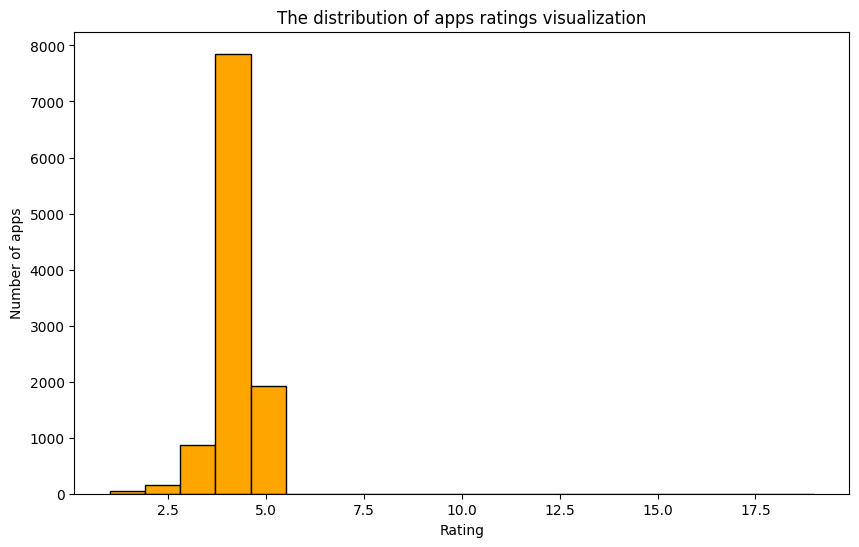

In [93]:
# step1: histogram for data

# plot histogram of apps Ratings data
plt.figure(figsize=(10, 6))
plt.hist(google_play_store_df_cleaned['Rating'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('The distribution of apps ratings visualization')
plt.xlabel('Rating')
plt.ylabel('Number of apps')
plt.show()

#### 📋 Explain the output:
- Most apps have Ratings between 3 and 5
- The tallest bar Ratings is around 4 to 4.5 so most apps are rated highly
- There are few apps with Ratings below 3 or above 5 thoes are outliers

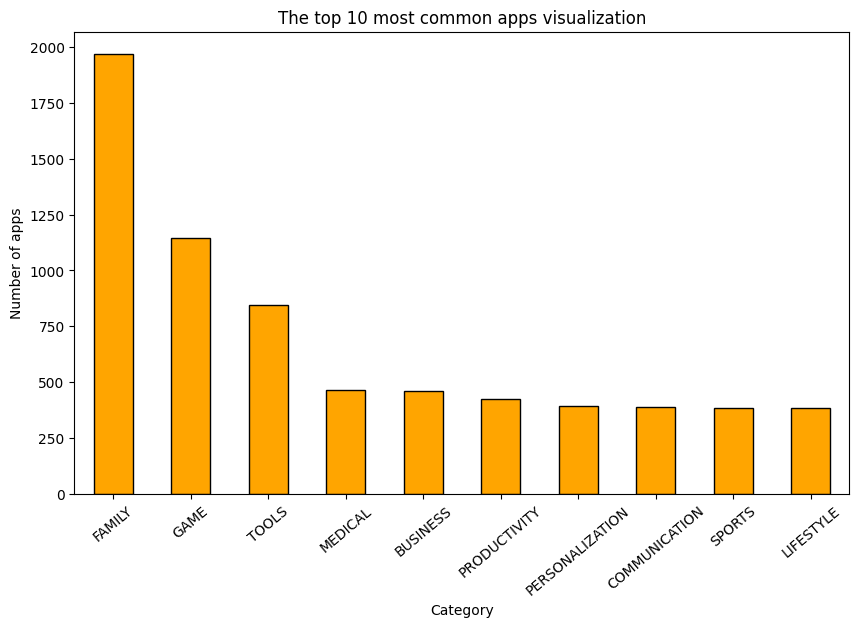

In [94]:
# step2: bar plot for data 

# get top 10 most common Category values
top_categories = google_play_store_df_cleaned['Category'].value_counts().head(10)

# plot bar chart
plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='orange', edgecolor='black')
plt.title('The top 10 most common apps visualization')
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.xticks(rotation=40)
plt.show()

#### 📋 Explain the output:
- Family apps are the most popular
- Medical and others Category have fewer apps